In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.set_option('display.max_columns',None,'display.max_rows',200)

In [3]:
bike=pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796



Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [4]:
bike['season']=bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike['weathersit']=bike['weathersit'].map({1:'clear',2:'cloudy',3:'snow',4:'rain'})
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,12,0,5,1,cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,12,0,6,0,cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,12,0,0,0,cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,12,0,1,1,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


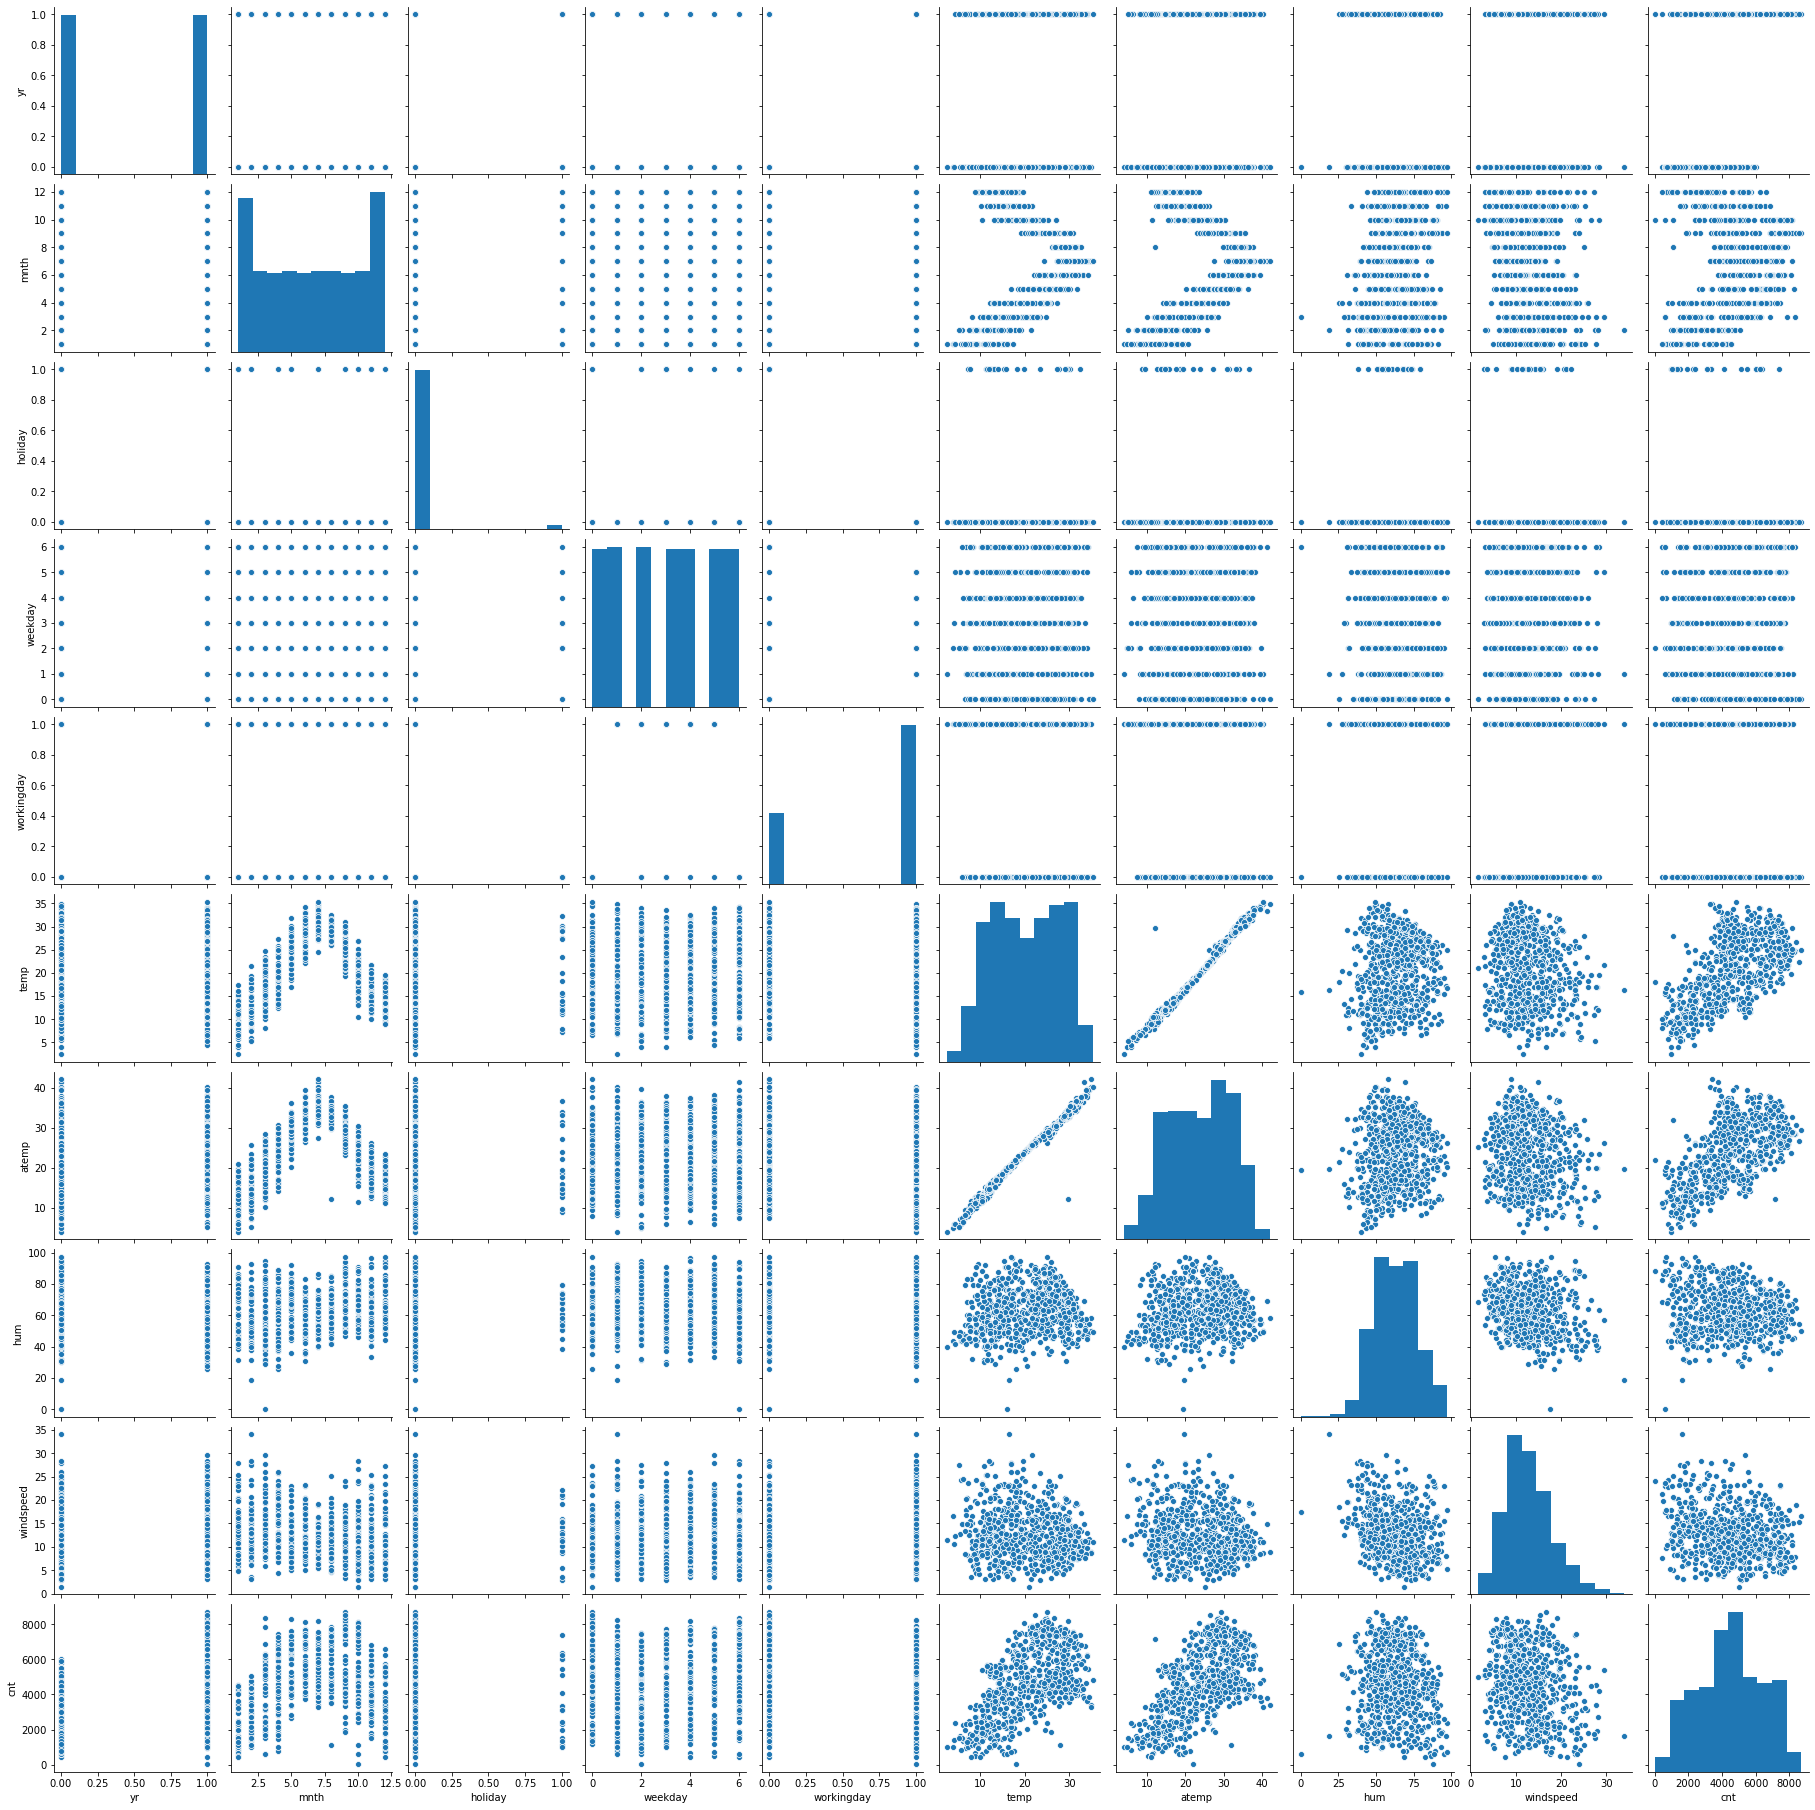

In [58]:
sns.pairplot(bike)
plt.show()

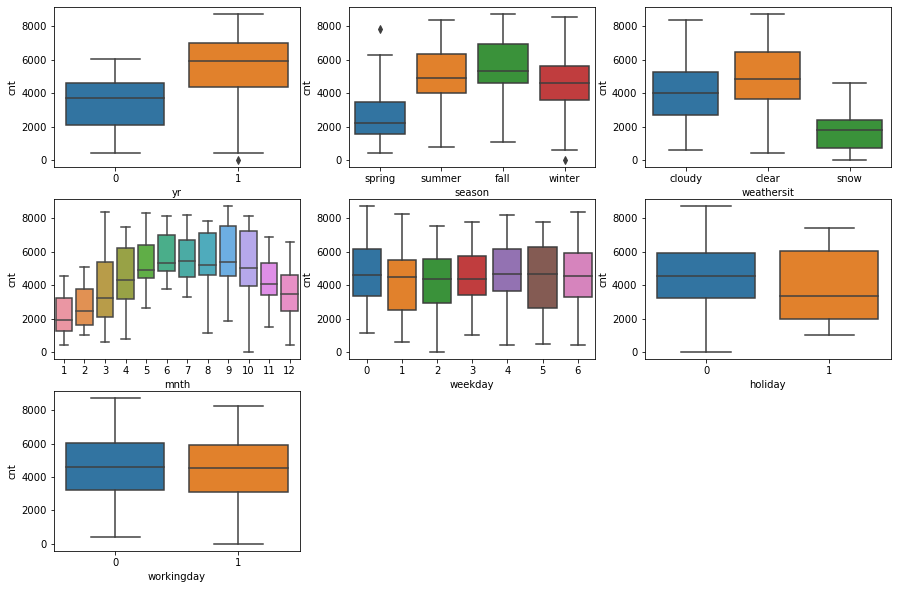

In [8]:
categories=['yr','season','weathersit','mnth','weekday','holiday','workingday']
plt.figure(figsize=(15,10))
for i in range(len(categories)):
    
    plt.subplot(3,3,i+1)
    sns.boxplot(x=categories[i],y='cnt',data=bike)

plt.show()

`Inference:` 
1. `Spring` is the least preferred season for renting a bike. `Summer` and `Fall` being the most.
2. `Aug` to `Oct` being the month rental count is high.
3. `Day of the week` and `workingday` does not matter.
4. `Clear` weather is important. Most importantly, it should not snow.
5. `yr` 2019 has major impact on bike rentals.
6. Bike rentals are most on working days rather than `holiday`

`weathersit` and `season` seem to be the two important predictors.

In [9]:
# We already have `mnth` and `yr` so we do not need `dteday`
# Removing column `dteday`
bike.drop(['dteday'],inplace=True,axis=1)

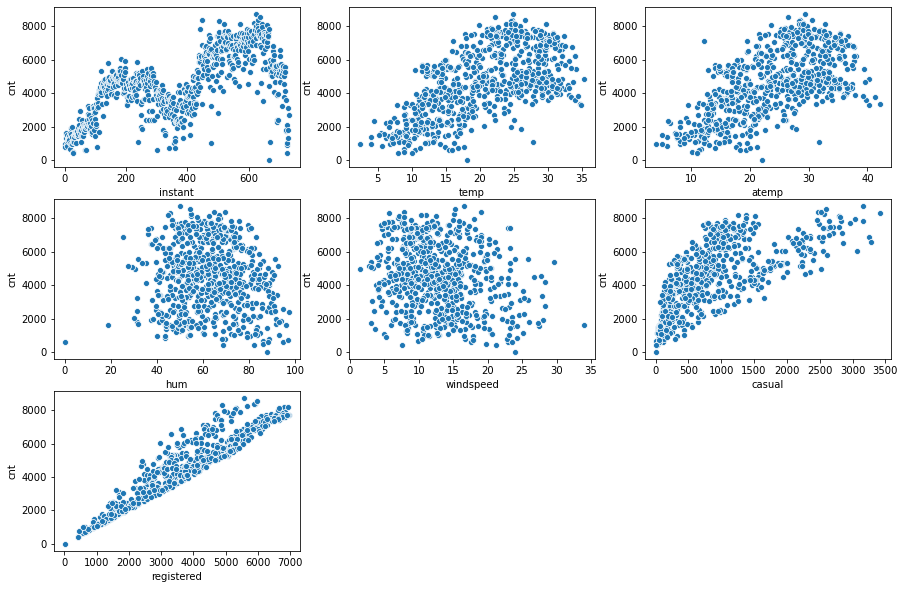

In [10]:
#Analyzing numerical variables
vars=['instant','temp','atemp','hum','windspeed','casual','registered']
plt.figure(figsize=(15,10))
for i in range(len(vars)):
    
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=vars[i],y='cnt',data=bike)

plt.show()

`Inference:`  `temp` and `atemp` seem to be interrelated.

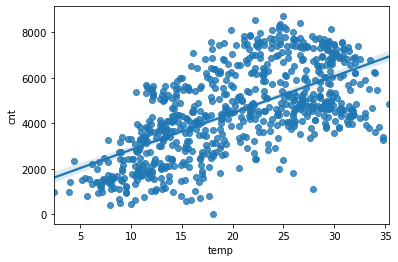

In [64]:
sns.regplot(x='temp',y='cnt',data=bike)

X and Y follow a linear relationship.

In [11]:
# Since `cnt` is a sum of `casual` and `registered`, we can remove them.
# Since `instant` is just an index. It does not make a difference.
# dropping `casual`, `registered`,`instant`
bike.drop(['casual', 'registered','instant'],axis=1,inplace=True)


In [12]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,12,0,5,1,cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,12,0,6,0,cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,12,0,0,0,cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,12,0,1,1,clear,10.489153,11.58500,48.3333,23.500518,1796


In [13]:
season_new=pd.get_dummies(bike.season,drop_first=True)
season_new=season_new.rename(columns={'spring':'season_spring','fall':'season_fall','summer':'season_summer','winter':'season_winter'})
weather_new=pd.get_dummies(bike.weathersit,drop_first=True)


In [56]:
weather_new.head()

,cloudy,snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [14]:
mnth_new=pd.get_dummies(bike.mnth,drop_first=True)
mnth_new=mnth_new.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
weekday_new=pd.get_dummies(bike.weekday,drop_first=True)
weekday_new=weekday_new.rename(columns={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [16]:
bike_new=pd.concat([bike,season_new,weather_new,mnth_new,weekday_new],axis=1)

In [17]:
bike_new.drop(['weathersit','season','mnth','weekday'],inplace=True,axis=1)

In [18]:
bike_new

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,cloudy,snow,Feb,Mar,April,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [19]:
# Train-Test split
bike_train,bike_test=train_test_split(bike_new,train_size=0.7,random_state=100)

In [20]:
# Creating scaler object using MinMaxScaler
scaler=MinMaxScaler()

num_features=['temp','atemp','hum','windspeed','cnt']

bike_train[num_features]=scaler.fit_transform(bike_train[num_features])

<ipython-input-20-3e24258aae2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_train[num_features]=scaler.fit_transform(bike_train[num_features])
C:\Users\Yuthika\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


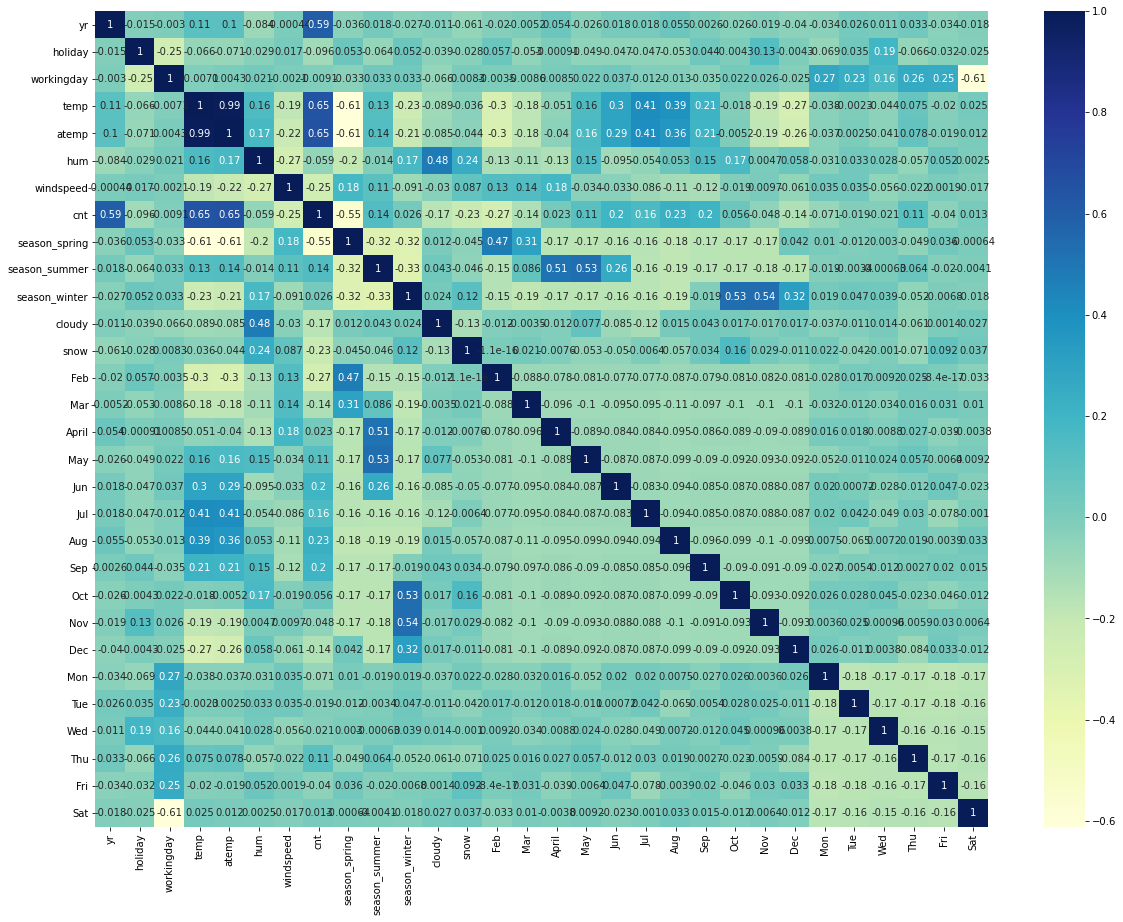

In [21]:
# plotting a heat map
plt.figure(figsize=(20,15))
sns.heatmap(bike_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

`Inference:`
1. `temp` and `atemp` are very highly corelated. we need to remove one of them.
2. `yr` is highly correlated to `cnt`
3. `summer` is best in `Jun` and `Jul`
4.  `winter` is best in `Oct` and `Nov`
5. `Spring` is best in `Feb` and `Mar`

#### LabelEncoder-study about it

# Using Mixed approach for creating the best model
## Automating with RFE

In [22]:
y_train=bike_train.pop('cnt')
X_train=bike_train

Trained RFE for 20 then 15 and then 12 variables

In [23]:
# Creating RFE model
# Model 1
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,12)
rfe.fit(X_train,y_train)

C:\Users\Yuthika\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=LinearRegression(), n_features_to_select=12)

In [24]:
# Viewing the columns that RFE did not consider
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_spring', 'Feb', 'Mar', 'April', 'May',
       'Jun', 'Jul', 'Nov', 'Dec', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
      dtype='object')

`Inference:`:
1. `workingday` and all other weekdays have been dropped. We already saw in the above boxplots that `weekday` and `workingday` does not matter.
2. `atemp` was creating Multicollinearity.
3. Most of the months were removed except Aug, Sep, Oct
4. `season_spring` was the worst season for bike rental. So got removed.

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('cloudy', True, 1),
 ('snow', True, 1),
 ('Feb', False, 14),
 ('Mar', False, 3),
 ('April', False, 6),
 ('May', False, 4),
 ('Jun', False, 5),
 ('Jul', False, 15),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 16),
 ('Dec', False, 17),
 ('Mon', False, 12),
 ('Tue', False, 13),
 ('Wed', False, 11),
 ('Thu', False, 9),
 ('Fri', False, 10),
 ('Sat', False, 18)]

In [26]:
col=X_train.columns[rfe.support_]
X_train_rfe=X_train[col]

In [27]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [28]:
# Model 1
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.49e-190
Time:                        10:31:45   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2390      0.027      8.838      0.000       0.186       0.292
yr                0.2289      0.008     28.264      0.000       0.213       0.245
holiday          -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp              0.5316      0.022     23.836      0.000       0.488       0.575
hum              -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed        -0.1868      0.026     -7.291      0.000      -0.237      -0.136
season_summer     0.1058      0.011      9.719      0.000       0.084       0.127
season_winter     0.1353      0.012     11.180      0.000       0.112       0.159
cloudy           -0.0531      0.010     -5.073      0.000      -0.074      -0.033
snow             -0.2385      0.026     -9.052      0.000      -0.290      -0.187
Aug               0.0585      0.016      3.583      0.000       0.026       0.091
Sep               0.1277      0.016      7.803      0.000       0.096       0.160
Oct               0.0358      0.018      2.046      0.041       0.001       0.070
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Calculating VIF for each variable
def vif(X):
    vif=pd.DataFrame()

    vif['Features']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['vif']=round(vif['vif'],2)
    vif=vif.sort_values(by='vif',ascending=False)
    return vif

In [30]:
vif(X_train_rfe)

,Features,vif
0,const,45.88
4,hum,1.86
7,season_winter,1.71
3,temp,1.59
8,cloudy,1.55
12,Oct,1.48
10,Aug,1.45
6,season_summer,1.38
9,snow,1.24
11,Sep,1.24


Removing `atemp` as it has p-value>0.05 and vif>10.

But `const` and `working_day` have low p-value but very high vif's . So removing `const` first.

In [31]:
X_train_rfe.drop(['const'],inplace=True,axis=1)

In [32]:
# Model 2
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1379.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:31:45   Log-Likelihood:                          472.77
No. Observations:                 510   AIC:                                     -921.5
Df Residuals:                     498   BIC:                                     -870.7
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2422      0.009     28.323      0.000       0.225       0.259
holiday          -0.0861      0.027     -3.140      0.002      -0.140      -0.032
temp              0.5829      0.023     25.190      0.000       0.537       0.628
hum               0.0808      0.024      3.311      0.001       0.033       0.129
windspeed        -0.0550      0.022     -2.457      0.014      -0.099      -0.011
season_summer     0.1034      0.012      8.839      0.000       0.080       0.126
season_winter     0.1460      0.013     11.279      0.000       0.121       0.171
cloudy           -0.0823      0.011     -7.713      0.000      -0.103      -0.061
snow             -0.3042      0.027    -11.200      0.000      -0.358      -0.251
Aug               0.0474      0.018      2.708      0.007       0.013       0.082
Sep               0.1132      0.017      6.468      0.000       0.079       0.148
Oct               0.0166      0.019      0.891      0.374      -0.020       0.053
==============================================================================
Omnibus:                       76.456   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.097
Skew:                          -0.807   Prob(JB):                     1.91e-37
Kurtosis:                       5.314   Cond. No.                         9.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared got improved considerably from 84.2% to 97.1%

In [33]:
vif(X_train_rfe)

,Features,vif
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,season_winter,2.25
7,cloudy,2.13
0,yr,2.02
5,season_summer,1.84
9,Aug,1.60
11,Oct,1.60
10,Sep,1.34


Removing `Oct` as it has high p-value

In [34]:
X_train_rfe.drop(['Oct'],axis=1,inplace=True)

In [35]:
# Model 3
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.971
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1505.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:31:45   Log-Likelihood:                          472.37
No. Observations:                 510   AIC:                                     -922.7
Df Residuals:                     499   BIC:                                     -876.2
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2418      0.009     28.316      0.000       0.225       0.259
holiday          -0.0868      0.027     -3.166      0.002      -0.141      -0.033
temp              0.5860      0.023     25.620      0.000       0.541       0.631
hum               0.0793      0.024      3.256      0.001       0.031       0.127
windspeed        -0.0554      0.022     -2.473      0.014      -0.099      -0.011
season_summer     0.1026      0.012      8.799      0.000       0.080       0.126
season_winter     0.1514      0.011     13.269      0.000       0.129       0.174
cloudy           -0.0818      0.011     -7.677      0.000      -0.103      -0.061
snow             -0.3011      0.027    -11.181      0.000      -0.354      -0.248
Aug               0.0461      0.017      2.641      0.009       0.012       0.080
Sep               0.1109      0.017      6.408      0.000       0.077       0.145
==============================================================================
Omnibus:                       72.545   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.433
Skew:                          -0.782   Prob(JB):                     2.92e-34
Kurtosis:                       5.196   Cond. No.                         9.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif(X_train_rfe)

,Features,vif
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
7,cloudy,2.13
0,yr,2.01
5,season_summer,1.83
6,season_winter,1.75
9,Aug,1.59
10,Sep,1.31
8,snow,1.16


Dropping `Oct` did not affect R-squared.
Removing `hum` as it has a high vif.

In [37]:
X_train_rfe.drop(['hum'],axis=1,inplace=True)

In [38]:
# Model 4
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              1624.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:31:46   Log-Likelihood:                          467.01
No. Observations:                 510   AIC:                                     -914.0
Df Residuals:                     500   BIC:                                     -871.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2440      0.009     28.389      0.000       0.227       0.261
holiday          -0.0807      0.028     -2.923      0.004      -0.135      -0.026
temp              0.6377      0.017     38.331      0.000       0.605       0.670
windspeed        -0.0286      0.021     -1.361      0.174      -0.070       0.013
season_summer     0.1053      0.012      8.968      0.000       0.082       0.128
season_winter     0.1658      0.011     15.626      0.000       0.145       0.187
cloudy           -0.0628      0.009     -6.977      0.000      -0.081      -0.045
snow             -0.2784      0.026    -10.602      0.000      -0.330      -0.227
Aug               0.0426      0.018      2.424      0.016       0.008       0.077
Sep               0.1122      0.017      6.424      0.000       0.078       0.147
==============================================================================
Omnibus:                       82.545   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.960
Skew:                          -0.875   Prob(JB):                     2.27e-39
Kurtosis:                       5.305   Cond. No.                         6.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
vif(X_train_rfe)

,Features,vif
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_summer,1.82
8,Aug,1.58
6,cloudy,1.49
5,season_winter,1.48
9,Sep,1.31
7,snow,1.08
1,holiday,1.04


Removing `windspeed` as it has high p-value

In [40]:
X_train_rfe.drop(['windspeed'],axis=1,inplace=True)

In [41]:
# Model 5
lm=sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1801.
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                        0.00
Time:                        10:31:46   Log-Likelihood:                          466.06
No. Observations:                 510   AIC:                                     -914.1
Df Residuals:                     501   BIC:                                     -876.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2420      0.008     28.558      0.000       0.225       0.259
holiday          -0.0839      0.028     -3.048      0.002      -0.138      -0.030
temp              0.6271      0.015     42.589      0.000       0.598       0.656
season_summer     0.1034      0.012      8.861      0.000       0.080       0.126
season_winter     0.1641      0.011     15.562      0.000       0.143       0.185
cloudy           -0.0649      0.009     -7.320      0.000      -0.082      -0.048
snow             -0.2834      0.026    -10.886      0.000      -0.335      -0.232
Aug               0.0456      0.017      2.611      0.009       0.011       0.080
Sep               0.1151      0.017      6.631      0.000       0.081       0.149
==============================================================================
Omnibus:                       80.374   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.146
Skew:                          -0.850   Prob(JB):                     9.28e-39
Kurtosis:                       5.314   Cond. No.                         6.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif(X_train_rfe)

,Features,vif
2,temp,3.92
0,yr,1.94
3,season_summer,1.79
7,Aug,1.56
4,season_winter,1.46
5,cloudy,1.45
8,Sep,1.29
6,snow,1.06
1,holiday,1.03


#### Model #5 seems to be the best fit

In [43]:
# Residual analysis of the train data
# Checking if the error terms are normally distributed.
y_train_cnt=lm.predict(X_train_rfe)

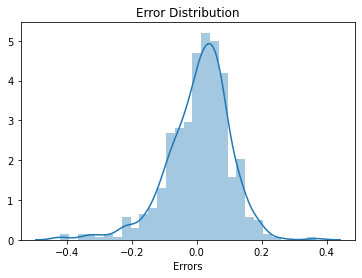

In [44]:
sns.distplot(y_train-y_train_cnt)
plt.title('Error Distribution')
plt.xlabel('Errors') 
plt.show()

Error terms are normally distributed.

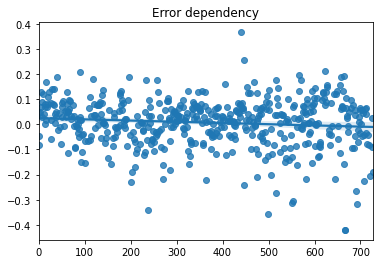

In [68]:
sns.regplot(X_train_rfe.index,y_train-y_train_cnt)
plt.title('Error dependency')
plt.show()

In [45]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'season_summer', 'season_winter', 'cloudy',
       'snow', 'Aug', 'Sep'],
      dtype='object')

In [46]:
bike_test.shape

(220, 30)

In [47]:
# Preparing test data for feeding into the model
# scaling numerical variables first
num_features=['temp','atemp','hum','windspeed','cnt']

bike_test[num_features]=scaler.transform(bike_test[num_features])

<ipython-input-47-48e092466ffe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_test[num_features]=scaler.transform(bike_test[num_features])
C:\Users\Yuthika\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [48]:
X_test=bike_test[X_train_rfe.columns]

In [49]:
y_test=bike_test['cnt']

In [50]:
X_test.head()

,yr,holiday,temp,season_summer,season_winter,cloudy,snow,Aug,Sep
184,0,1,0.831783,0,0,1,0,0,0
535,1,0,0.901354,1,0,0,0,0,0
299,0,0,0.511964,0,1,1,0,0,0
221,0,0,0.881625,0,0,0,0,1,0
152,0,0,0.817246,1,0,0,0,0,0


In [51]:
# predicting y values
y_test_predict=lm.predict(X_test)

In [52]:
# r2_score for test
r2=r2_score(y_true=y_test,y_pred=y_test_predict)
r2

0.7913868292349024

In [53]:
# r2_score for model
r2=r2_score(y_true=y_train,y_pred=y_train_cnt)
r2

0.8127206191252142

Difference between r2_score for test and model is less.

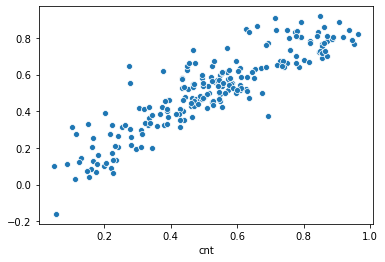

In [54]:
sns.scatterplot(y_test,y_test_predict)

### We finally have 9 variables/factors that affect the number bikes rented everyday.
### The above model fits about 97% of the variables, which is good.

Final equation for this model:
### cnt = yr*(0.2420) + holiday*(-0.0839)+temp*(0.6271) + season_summer*(0.10346) + season_winter*(0.16415) + cloudy*(-0.0649) + snow*(-0.2834) + Aug*(0.0456) + Sep*(0.1151)
